# Image Classification with CNN using Keras

# Task 1: Import Libraries

In [1]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.14.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is using GPU? False


# Task 2: Preprocess Data

In [2]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)

    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [3]:
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.cifar10.load_data()
x_train, y_train = get_three_classes(x_train, y_train)
x_test, y_test = get_three_classes(x_test, y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


# Task 3: Visualize Examples

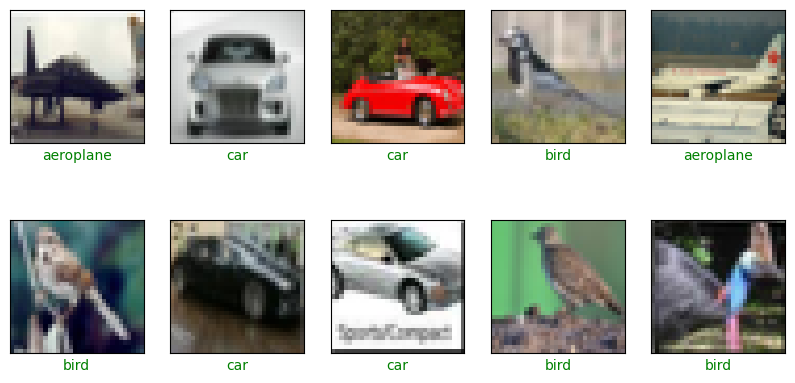

In [4]:
class_names = ['aeroplane', 'car', 'bird']

def show_random_examples(x, y, p):
    indices = np.random.choice(range(x.shape[0]), 10, replace = False)
    
    x = x[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize = (10,5))
    for i in range(10):
        plt.subplot(2, 5, 1+i)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col = "green" if np.argmax(y[i]) == np.argmax(p[i]) else "red"
        plt.xlabel(class_names[np.argmax(p[i])], color = col)
    plt.show()
    

show_random_examples(x_train,y_train, y_train)

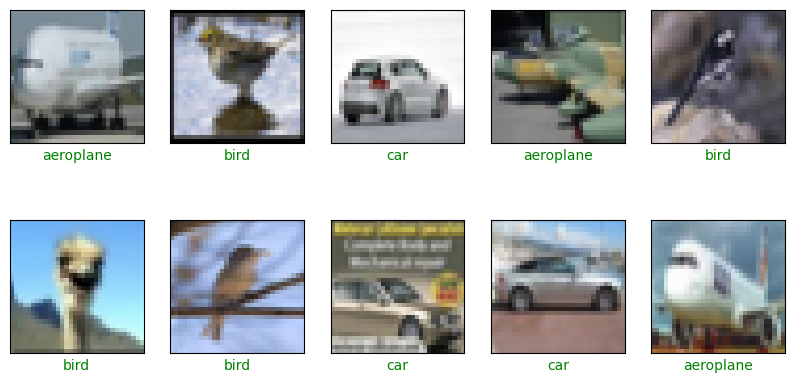

In [5]:
show_random_examples(x_test, y_test, y_test)

# Task 4: Create Model

In [6]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

def create_model():
    def add_conv_block(moel, num_filters):
        model.add(Conv2D(num_filters, 3, activation ="relu", padding ="same"))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters, 3, activation = "relu"))
        model.add(MaxPooling2D(pool_size = 2))
        model.add(Dropout(0.5))
        return model
    
    model = tf.keras.models.Sequential()
    model.add(Input(shape=(32,32, 3)))
    
    model = add_conv_block(model, 32)
    model = add_conv_block(model, 64)
    model = add_conv_block(model, 128)
    
    model.add(Flatten())
    model.add(Dense(3, activation ='softmax'))
    
    model.compile(
        loss ='categorical_crossentropy',
        optimizer ='adam',
        metrics = ["accuracy"]
    )
    return model

model = create_model()
model.summary()
 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        1

# Task5:Train the Model

In [8]:
h = model.fit(
    x_train/255., y_train,
    validation_data =(x_test/255., y_test),
    epochs= 10, batch_size =128,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience =3),
        tf.keras.callbacks.ModelCheckpoint(
            'models/model_{val_accuracy:.3f}.h5',
            save_best_only = True, save_weights_only=False,
            monitor='val_accuracy'
        )
    ]
)

Epoch 1/10
118/118 [==============================] - ETA: 0s - loss: 0.8969 - accuracy: 0.6735

d:\Anaconda\AnacondaApp\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


118/118 [==============================] - 204s 2s/step - loss: 0.8969 - accuracy: 0.6735 - val_loss: 2.6004 - val_accuracy: 0.3333
Epoch 2/10
118/118 [==============================] - 147s 1s/step - loss: 0.5671 - accuracy: 0.7712 - val_loss: 2.2021 - val_accuracy: 0.5000
Epoch 3/10
118/118 [==============================] - 149s 1s/step - loss: 0.4944 - accuracy: 0.8011 - val_loss: 1.8574 - val_accuracy: 0.5433
Epoch 4/10
118/118 [==============================] - 113s 956ms/step - loss: 0.4545 - accuracy: 0.8166 - val_loss: 0.9876 - val_accuracy: 0.6233
Epoch 5/10
118/118 [==============================] - 112s 947ms/step - loss: 0.4100 - accuracy: 0.8399 - val_loss: 0.6852 - val_accuracy: 0.7420
Epoch 6/10
118/118 [==============================] - 113s 955ms/step - loss: 0.3800 - accuracy: 0.8521 - val_loss: 1.1095 - val_accuracy: 0.6600
Epoch 7/10
118/118 [==============================] - 112s 954ms/step - loss: 0.3523 - accuracy: 0.8626 - val_loss: 0.3024 - val_accuracy: 0.878

# Task6:Final Predictions

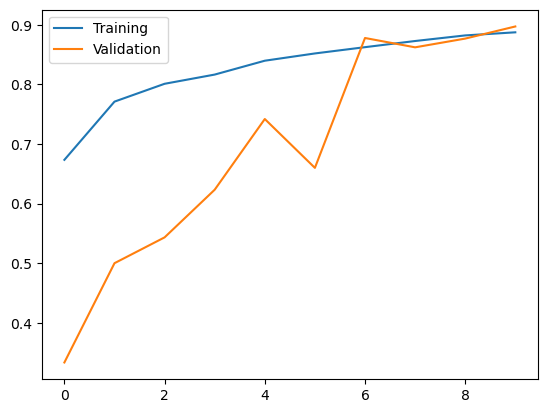

In [9]:
accs = h.history['accuracy']
val_accs = h.history['val_accuracy']

plt.plot(range(len(accs)), accs, label="Training")
plt.plot(range(len(accs)), val_accs, label="Validation")
plt.legend()
plt.show()

In [12]:
model = tf.keras.models.load_model("models/model_0.897.h5")

In [13]:
preds = model.predict(x_test/255.)

94/94 [==============================] - 9s 81ms/step


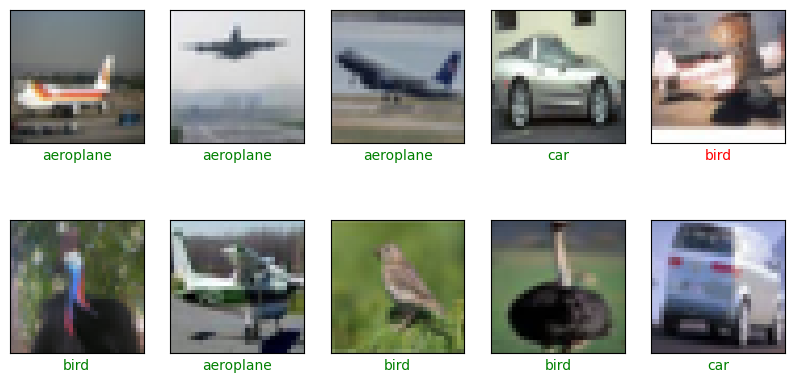

In [14]:
show_random_examples(x_test, y_test, preds)